<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml1027/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tibaml1027/raw/main/train.csv"
urlretrieve(url, "train.csv")
train = pd.read_csv("train.csv", encoding="utf-8")
url = "https://github.com/Elwing-Chou/tibaml1027/raw/main/test.csv"
urlretrieve(url, "test.csv")
test = pd.read_csv("test.csv", encoding="utf-8")

In [2]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# concat
datas = pd.concat([train, test], axis=0, ignore_index=True)
datas = datas.drop(["PassengerId", "Survived"], axis=1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# 篩選操作 Series/DataFrame[跟你的資料筆數依樣多的True/False]
s = datas.isna().sum()
s[s > 0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [5]:
most = datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)
# 再看一下缺多少
s = datas.isna().sum()
s[s > 0].sort_values(ascending=False)

Cabin    1014
Age       263
Fare        1
dtype: int64

In [6]:
import re
def name(s):
    # .+任意一次以上 , \s*空白零次以上 (.+) \. .+
    # 比.好的 [a-zA-Z\s\(\)']
    pattern = r".+,\s*(.+)\..+"
    # s = "Braund, Mr. Owen Harris"
    pat = re.compile(pattern)
    return pat.match(s).group(1)
datas["Name"].apply(name)

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [7]:
def name(s):
    return s.split(",")[-1].split(".")[0].strip()
datas["Name"] = datas["Name"].apply(name)

In [8]:
def cabin(c):
    if pd.isna(c):
        return c
    else:
        return c[0]
datas["Cabin"] = datas["Cabin"].apply(cabin)

In [9]:
dic = datas["Ticket"].value_counts()
datas["Ticket"] = datas["Ticket"].apply(lambda t:dic[t])

In [10]:
datas["Cabin"].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [11]:
med = datas.median().drop("Pclass")
datas = datas.fillna(med)
# 再看一下缺多少
s = datas.isna().sum()
s[s > 0].sort_values(ascending=False)

Cabin    1014
dtype: int64

In [12]:
c = datas["Name"].value_counts()
c = c[c > 50]
def name2(n):
    if n in c:
        return n
    else:
        return None
datas["Name"] = datas["Name"].apply(name2)

In [13]:
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [14]:
datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [15]:
# .iloc -> [1st row, 2nd row, 3rd....]
x = datas.iloc[:len(train)]
y = train["Survived"]
x_predict = datas.iloc[len(train):]

In [16]:
x_predict

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
891,34.5,0,0,1,7.8292,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
892,47.0,1,0,1,7.0000,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
893,62.0,0,0,1,9.6875,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
894,27.0,0,0,1,8.6625,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
895,22.0,1,1,2,12.2875,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators":range(21, 200, 2),
    "max_depth":range(5, 11)
}
clf = RandomForestClassifier()
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x, y)
print(search.best_score_)
print(search.best_params_)

In [18]:
import numpy as np
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=51, max_depth=7)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
print(scores)
print(np.average(scores))

[0.82222222 0.87640449 0.73033708 0.87640449 0.86516854 0.84269663
 0.84269663 0.7752809  0.85393258 0.82022472]
0.8305368289637954


In [29]:
clf = RandomForestClassifier(n_estimators=51, max_depth=7)
clf.fit(x, y)
pre = clf.predict(x_predict)
result = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":pre
})
result.to_csv("rf.csv", encoding="utf-8", index=False)
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [35]:
# !!!! 11/15
imp = pd.DataFrame(clf.feature_importances_,
                   columns=["Importance"],
                   index=datas.columns)
imp.sort_values(by="Importance", ascending=False)

,Importance
Sex_male,0.172345
Sex_female,0.150008
Name_Mr,0.126201
Fare,0.102961
Age,0.078981
Ticket,0.060637
Pclass_3,0.054024
Family,0.047026
Pclass_1,0.041766
SibSp,0.028188


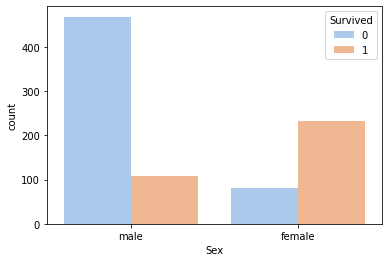

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=train["Sex"], 
              hue=train["Survived"],
              palette=sns.color_palette("pastel"))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


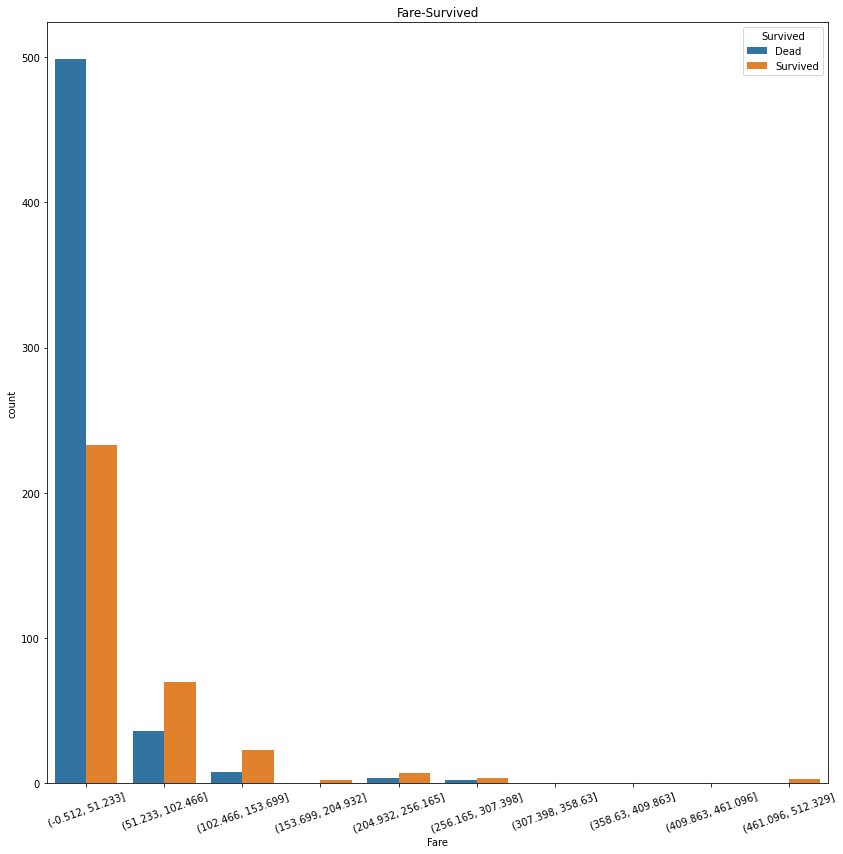

In [58]:
plt.figure(figsize=(14, 14))
c = pd.cut(train["Fare"], 10)
sns.countplot(c, hue=train["Survived"])
plt.title("Fare-Survived")
plt.xticks(rotation=20)
plt.legend(["Dead", "Survived"], loc="upper right", title="Survived")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


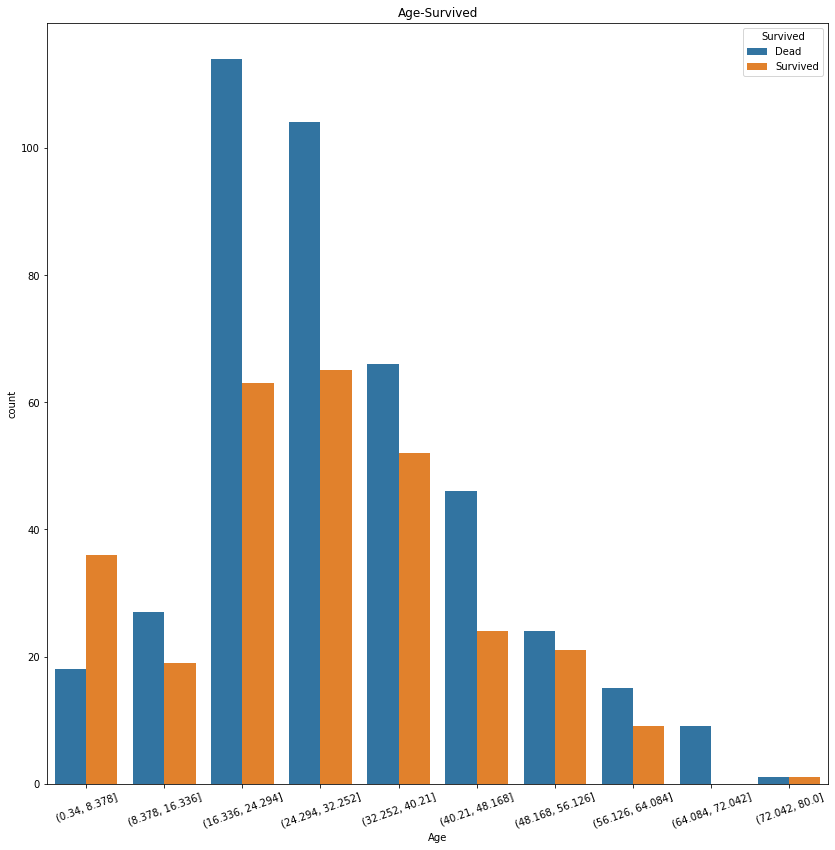

In [59]:
plt.figure(figsize=(14, 14))
c = pd.cut(train["Age"], 10)
sns.countplot(c, hue=train["Survived"])
plt.title("Age-Survived")
plt.xticks(rotation=20)
plt.legend(["Dead", "Survived"], loc="upper right", title="Survived")

In [ ]:
# !!!! 11/15
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scale = pd.DataFrame(scaler.fit_transform(datas),
                           columns=datas.columns)
datas_scale

In [26]:
# .iloc -> [1st row, 2nd row, 3rd....]
x_scale = datas_scale.iloc[:len(train)]
y = train["Survived"]
x_predict_scale = datas_scale.iloc[len(train):]

In [24]:
from sklearn.neighbors import KNeighborsClassifier
params = {
    "n_neighbors":range(5, 100)
}
clf = KNeighborsClassifier()
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x_scale, y)
print(search.best_score_)
print(search.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [28]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(x_predict_scale)
result = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":pre
})
result.to_csv("knn.csv", encoding="utf-8", index=False)
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
